In [5]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
#sys.path.append(os.path.abspath('Sources'))
import about_ml_models as mlm

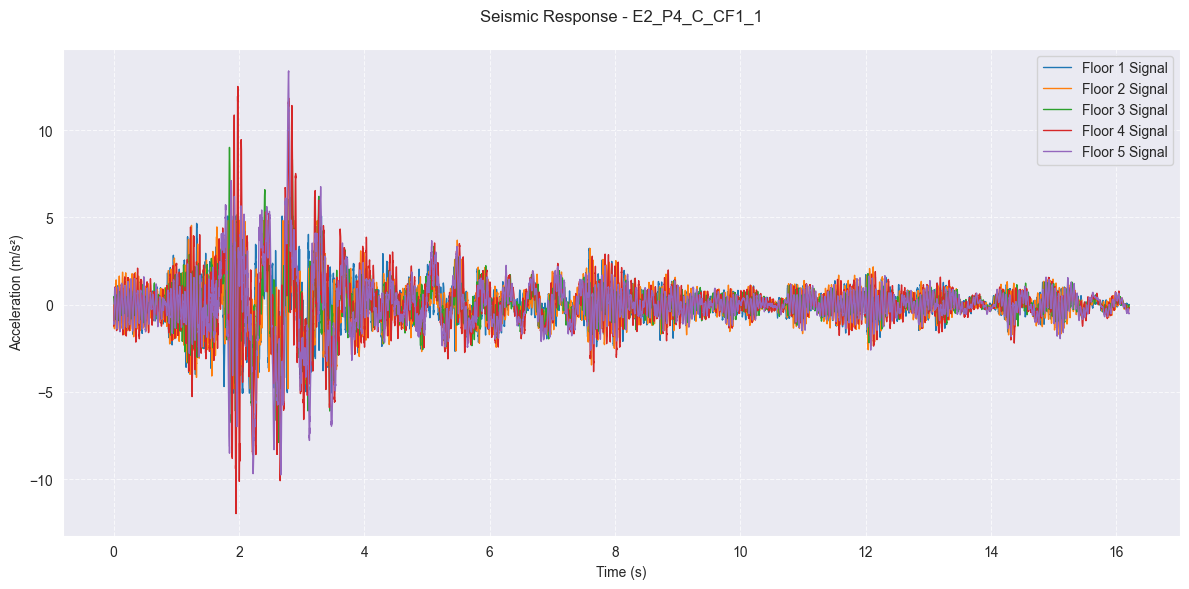


SEISMIC SIGNAL REPORT

GENERAL INFORMATION:
--------------------------------------------------
Signal ID: E2_P4_C_CF1_1
Structure E2: 6 columns, 5 levels
Earthquake C: Imperial Valley, 10/15/1979, El Centro
Damage Status: Damaged
Damage Location: Floor 4
Damage Severity: Level 0
--------------------------------------------------

INTENSITY MEASURES BY FLOOR:
--------------------------------------------------
+------+-------------------------------+-----------+------------+------------+------------+------------+
| IM   | Description                   |   Floor 1 |    Floor 2 |    Floor 3 |    Floor 4 |    Floor 5 |
+======+===============================+===========+============+============+============+============+
| PGA  | Peak Ground Acceleration      |    3.7852 |     4.5218 |     6.2525 |     8.5657 |    11.0437 |
+------+-------------------------------+-----------+------------+------------+------------+------------+
| PGV  | Peak Ground Velocity          |    0.1926 |     0.225

In [14]:
#falla =True -> para obtener datos con fallas estructurales
#falla =False -> para obtener datos sin fallas estructurales
#falla =None -> selección aleatoria de los datos

data_IM, X_new_scaled=mlm.get_seismic_signals(falla=None)

In [15]:
# Load models
models_det = mlm.load_models()

# Make predictions
results, consensus = mlm.predict_damage(X_new_scaled, models_det)


STRUCTURAL DAMAGE PREDICTION REPORT

Random Forest [1] 100.00%
XGBoost [1] 99.09%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Neural Network [1] 99.64%
MODEL PREDICTIONS:
--------------------------------------------------
+----------------+--------------+----------------------+
| Model          | Prediction   | Damage Probability   |
+================+==============+======================+
| Random Forest  | Damaged      | 100.00%              |
+----------------+--------------+----------------------+
| XGBoost        | Damaged      | 99.09%               |
+----------------+--------------+----------------------+
| Neural Network | Damaged      | 99.64%               |
+----------------+--------------+----------------------+


CONSENSUS ANALYSIS:
--------------------------------------------------
Model Agreement: 100%
Final Assessment: HIGH PROBABILITY OF DAMAGE
--------------------------------------------------


In [16]:
# damage location prediction
if consensus>0.5:
    mlm.ubicar_falla(data_IM)


STRUCTURAL DAMAGE LOCATION PREDICTION REPORT

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[[8.939500e-06 1.737965e-04 8.518774e-03 9.984173e-01]]
3
MODEL PREDICTIONS:
--------------------------------------------------
+----------------+----------------------+--------------+
| Model          | Predicted Location   | Confidence   |
+================+======================+==============+
| Random Forest  | Floor 4              | 96.00%       |
+----------------+----------------------+--------------+
| XGBoost        | Floor 4              | 99.33%       |
+----------------+----------------------+--------------+
| Neural Network | Floor 4              | 99.84%       |
+----------------+----------------------+--------------+


DETAILED PROBABILITY ANALYSIS:
--------------------------------------------------
+----------------+-----------+-----------+-----------+-----------+
| Model          | Floor 1   | Floor 2   | Floor 3   | Floor 4   |
+================+===========+===========+===========+==